<a href="https://colab.research.google.com/github/MichaelAshton/time-series-prediction/blob/master/demo_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A demo of connecting the different eureka classes so far for a training run

### imports 

In [1]:
!nvidia-smi

Sun Feb 23 13:43:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!pip uninstall -y eureka254

In [3]:
!pip install mxnet-cu100==1.5.0
# replace the branch name at the end (master) with your preferred branch
!pip install git+https://github.com/MichaelAshton/time-series-prediction.git@master

     |████████████████████████████████| 540.1MB 30kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Cloning https://github.com/MichaelAshton/time-series-prediction.git (to revision master) to /tmp/pip-req-build-_ou8i5m9
  Running command git clone -q https://github.com/MichaelAshton/time-series-prediction.git /tmp/pip-req-build-_ou8i5m9
     |████████████████████████████████| 102kB 3.4MB/s 
     |████████████████████████████████| 911kB 9.0MB/s 
     |████████████████████████████████| 5.9MB 49.8MB/s 
     |████████████████████████████████| 28.4MB 111kB/s 
     |████████████████████████████████| 266kB 66.0MB/s 
     |████████████████████████████████| 13.8MB 242kB/s 
     |████████████████████████████████| 112kB 52.7MB/s 
     |████████████████████████████████| 276kB 66.4MB/s 
     |████████████████████████████████| 6.7MB 45.4MB/s 
     |████████████████████████████████| 512kB 65.3MB/s 
     |███████████

In [0]:
# mount google dirve
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

### Eureka package usage

In [0]:
import comet_ml

In [0]:
# set comet ml API and REST API Keys here
API_KEY = ""
REST_API_KEY = "" 
workspace= ""

In [23]:
db_username = ""
db_password = ""
db_ip = ""
db_database = ""
scrappy_username=""
scrappy_password=""

%env db_username={db_username}
%env db_password={db_password}
%env db_ip={db_ip}
%env db_database={db_database}
%env scrappy_username={scrappy_username}
%env scrappy_password={scrappy_password}

env: db_username=
env: db_password=
env: db_ip=
env: db_database=
env: scrappy_username=
env: scrappy_password=


DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57


In [5]:
from eureka254.TrainingHarness import TrainingHarness
import os
import numpy as np
from sklearn.metrics import *
from eureka254.DB import DB
from eureka254.ModelKwargs import *
import matplotlib.pyplot as plt

from eureka254.EurekaRegression import EurekaRegression
from eureka254.Evaluation import Evaluation


DB = DB()
TrainingHarness = TrainingHarness()
EurekaRegression = EurekaRegression()
Evaluation = Evaluation()

INFO:gluonts.model.wavenet._estimator:Using dilation depth 8 and receptive field length 256
/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
INFO:gluonts.model.wavenet._estimator:Using dilation depth 8 and receptive field length 256


In [0]:
training_pred_score_path = './'

In [0]:
saved_models_path = os.path.join(training_pred_score_path, 'saved_models')

In [0]:
os.makedirs(saved_models_path, exist_ok=True)

In [0]:
# get golden dataset
df = DB.create_golden_dataset()

In [0]:
# get the teams - teams_id pairs
teams_ids_df = DB.get_all_teams()

In [11]:
teams_ids_df.team1_id.unique().shape

(20,)

In [0]:
df.set_index('teams_id', inplace=True)
teams_ids_df.set_index('teams_id', inplace=True)

df['teams_name'] = teams_ids_df.loc[df.index, 'teams_name']

df = df.reset_index().set_index('teams_name')
df.rename(columns={'total_goals': 'goals'}, inplace=True)

In [13]:
# preprocess by position (all 10 positions)
teams_df, train_ds, test_ds = TrainingHarness.preprocess_by_position(df)

INFO:eureka254.TrainingHarness.TrainingHarness:Starting preprocessing time series by position before training routine starts
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:eureka254.TrainingHarness.TrainingHarness:Finished preprocessing time series by position


In [14]:
# preprocess by team (all 20 teams)
teams_df, train_ds, test_ds = TrainingHarness.preprocess_by_teams(df)

INFO:eureka254.TrainingHarness.TrainingHarness:Starting preprocessing time series by teams before training routine starts
INFO:eureka254.TrainingHarness.TrainingHarness:Finished preprocessing time series by teams


In [15]:
experiment = EurekaRegression.fit(x_y_data=df, training_pred_score_path=training_pred_score_path, type_of_time_series='teams', cv_flag=False, api_key=API_KEY, rest_api_key=REST_API_KEY, param_search='bayes', workspace=workspace)

INFO:eureka254.TrainingHarness.TrainingHarness:Starting preprocessing time series by teams before training routine starts
INFO:eureka254.TrainingHarness.TrainingHarness:Finished preprocessing time series by teams
INFO:eureka254.TrainingHarness.TrainingHarness:Starting generic score train loop
COMET WARNING: Passing Experiment through Optimizer constructor is deprecated; pass them to Optimizer.get_experiments or Optimizer.next
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: optimizer_url, namespace: ['comet']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_OPTIMIZER_URL
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_OPTIMIZER_URL
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_OPTIMIZER_URL
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching 

In [16]:
tss, preds, load_path = EurekaRegression.predict(x_y_data=test_ds, training_pred_score_path=training_pred_score_path)

DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG:urllib3.connectionpool:https://www.comet.ml:443 "POST /clientlib/notify/event HTTP/1.1" 200 57


In [17]:
for model_name in tss.keys():
    
    save_path = os.path.join(training_pred_score_path, f'saved_models/{model_name}_gluonts_metrics.csv')
    
    metrics_df = Evaluation.gluonts_evaluation(tss[model_name], preds[model_name], load_path[model_name], test_ds)
    
    metrics_df.to_csv(save_path)
    
#     experiment.log_asset(save_path)
        
    print(f'{model_name} : \n {metrics_df[["MASE", "abs_error", "MSE"]].head()}\n\n' )

Running evaluation: 100%|██████████| 20/20 [00:00<00:00, 178.00it/s]

SimpleFeedForward : 
        MASE   abs_error        MSE
0  1.313289  171.714127  22.997510
1  1.143208  152.696121  17.325964
2  1.006154  127.304459  10.361823
3  1.176596  152.405029  14.215098
4  0.907184  120.830086  11.185170


DeepAREstimate : 
        MASE   abs_error        MSE
0  0.880518  115.128716   7.938256
1  0.901765  120.447014   9.255793
2  1.047893  132.585464  10.682549
3  1.191082  154.281525  14.069144
4  1.063090  141.595596  13.701069




In [0]:
def plot_log_and_save_graphs(tss, preds, profit_df, saved_models_path, model_name, plot_length=300, prediction_intervals = (50.0, 90.0)):
    

    for index in profit_df.index.values[:5]:  
        
        experiment.log_metrics(profit_df.loc[index, ['mae', 'acc', 'profit', 'profit_rate']].to_dict(), prefix=f'{index}_{model_name}')

        legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
        fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        tss[index][-plot_length:].plot(ax=ax)  # plot the time series
        preds[index].plot(prediction_intervals=prediction_intervals, color='g')
        plt.grid(which="both")
        plt.legend(legend, loc="upper left")

        fig.canvas.draw()

        figure_name = f'{index}_{model_name}'

        experiment.log_figure(figure_name=figure_name, figure=fig)

        plt.savefig(os.path.join(saved_models_path, figure_name))



DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 

SimpleFeedForward : 
       r2    mse   acc profit profit_rate     odd_name investment   mae
14 -0.99  10.54  0.75    700         175  over35_odds        400  2.52
4  -0.65  11.19  0.83    500      166.67  over35_odds        300  2.42
19 -2.08  15.87   0.6    700       93.33  over35_odds        750  2.74
8  -2.71  19.52   0.2    200          80  over45_odds        250  3.27
15  -1.2  12.16  0.23    450       69.23  over45_odds        650  2.89




DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:

DeepAREstimate : 
       r2    mse   acc profit profit_rate     odd_name investment   mae
1  -0.98   9.26  0.55   1450      263.64  over45_odds        550  2.41
15  -1.1  11.62  0.23    550       84.62  over45_odds        650  2.81
14 -1.33  12.38  0.58    500       83.33  over35_odds        600  2.74
0  -0.65   7.94   0.6    600          80  over35_odds        750  2.30
13 -1.17  14.27  0.57    750       71.43  over35_odds       1050  3.05




DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.comet.ml:443
DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:urllib3.connecti

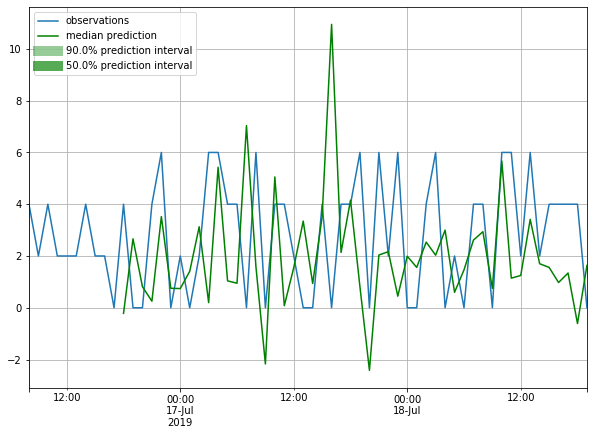

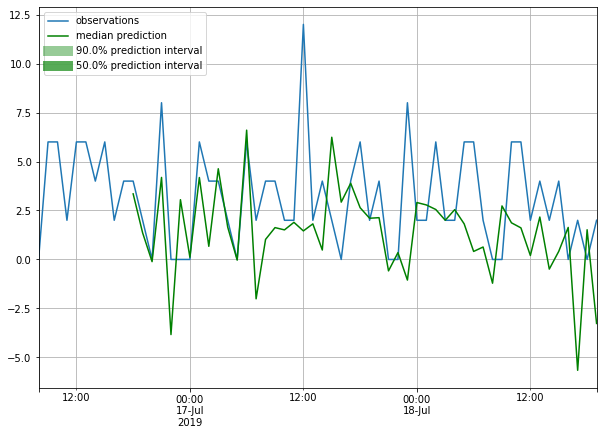

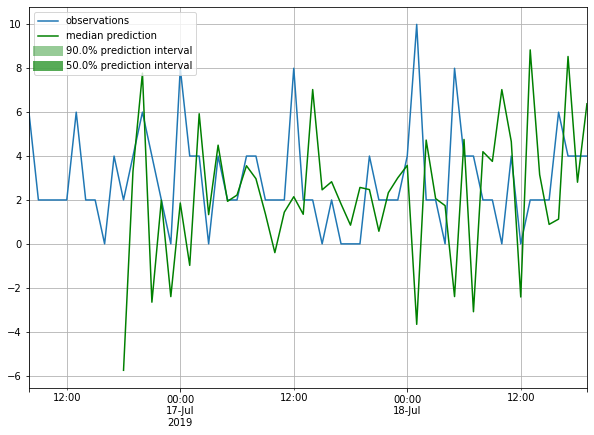

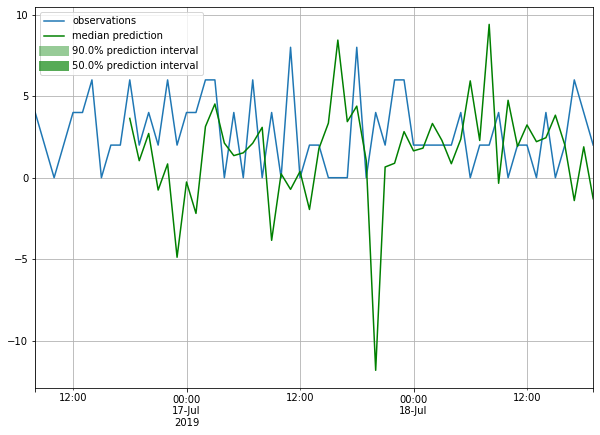

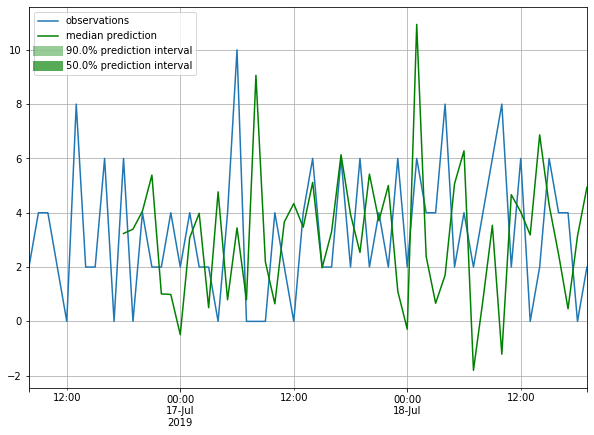

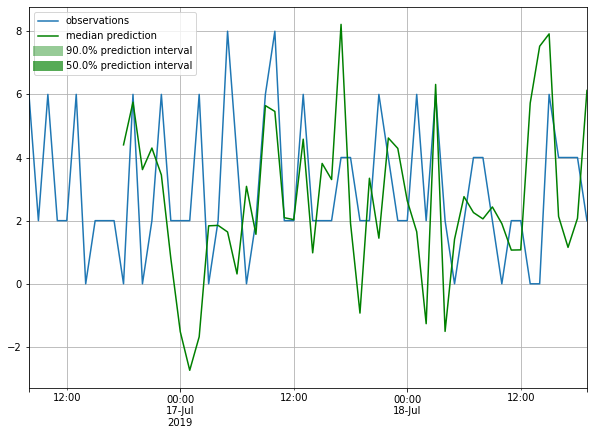

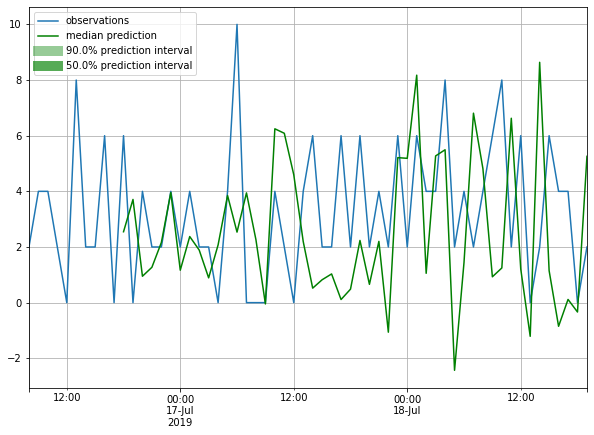

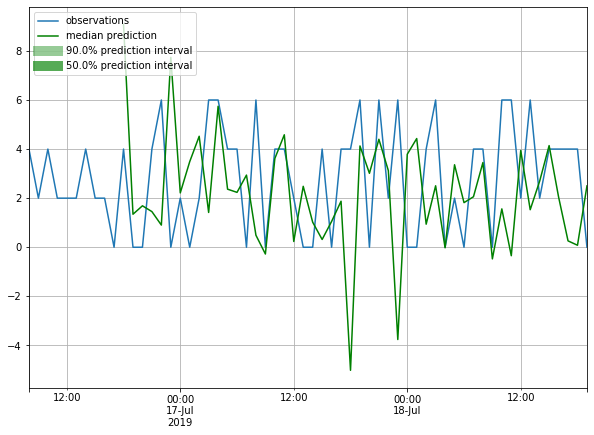

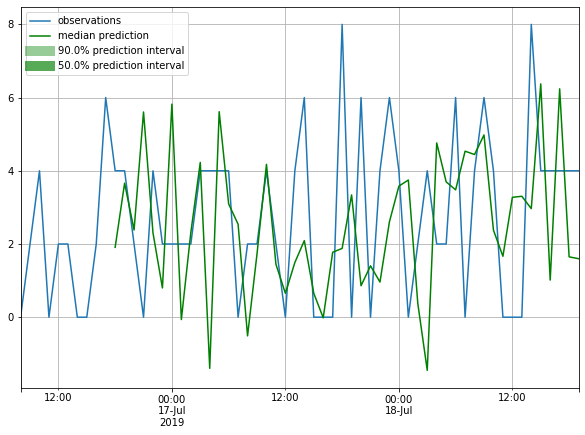

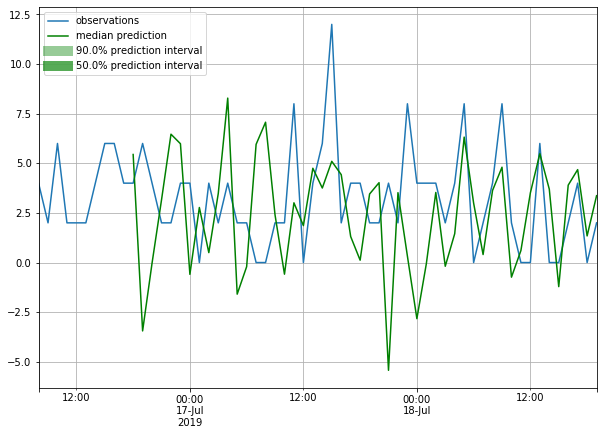

In [19]:
for model_name in tss.keys():
    
    save_path = os.path.join(training_pred_score_path, f'saved_models/{model_name}_profits.csv')
    
    profit_df = Evaluation.profit_evaluation(test_ds, preds[model_name], teams_df)
    
    profit_df.to_csv(save_path)
        
    print(f'{model_name} : \n {profit_df.head()}\n\n' )
    
    plot_log_and_save_graphs(tss[model_name], preds[model_name], profit_df, saved_models_path, model_name, plot_length=60, prediction_intervals=(50.0, 90.0))

In [20]:
for model_name in tss.keys():
    
    print(f'{model_name} : \n {Evaluation.plot_preds_graph(tss[model_name], preds[model_name], plot_length=60, prediction_intervals=(50.0, 90.0))}\n\n' )

interactive(children=(IntSlider(value=5, description='w', max=15, min=-5), Output()), _dom_classes=('widget-in…

SimpleFeedForward : 
 None




interactive(children=(IntSlider(value=5, description='w', max=15, min=-5), Output()), _dom_classes=('widget-in…

DeepAREstimate : 
 None




In [21]:
import shutil
shutil.make_archive(saved_models_path, 'zip', saved_models_path)

'/content/saved_models.zip'

In [22]:
experiment.log_asset(saved_models_path + '.zip')

{'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=141c40728d0c4d09a21bfbbbb5363880&experimentKey=edfd29832b3e46e7a5c33124dbe6c49c',
 'assetId': '141c40728d0c4d09a21bfbbbb5363880',
 'web': 'https://www.comet.ml/api/asset/download?assetId=141c40728d0c4d09a21bfbbbb5363880&experimentKey=edfd29832b3e46e7a5c33124dbe6c49c'}

DEBUG:everett:No INI file found: [None, './.comet.config', '~/.comet.config']
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
DEBUG:everett:Found nothing--returning NO_VALUE
DEBUG:everett:Looking up key: value, namespace: ['comet', 'allow_header']


In [0]:
  experiment.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
DEBUG:everett:Looking up key: name, namespace: ['comet', 'allow_header']
COMET INFO:   Data:
DEBUG:everett:Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_NAME
COMET INFO:     url: https://www.comet.ml/michaelashton/run-20190815-193237/c567edecf3194b7abee4bf7c93283677
DEBUG:everett:Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_NAME
COMET INFO:   Metrics [count] (min, max):
DEBUG:everett:Searching <ConfigIniEnv: /home/ashton/.comet.config> for key: name, namespace: ['comet', 'allow_header']
COMET INFO:     10_DeepAREstimate_acc           : (0.57, 0.57)
DEBUG:everett:Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_NAME
COMET INFO:     10_DeepAREstimate_mae           : (2.130000114440918, 2.130000114440918)
COMET INFO:     10_DeepAREstimate_profit        : (550.0, 550.0)
DEBUG:everett:Found nothing--returning NO_VALUE
COMET INFO:     10_DeepAREstimate_profit_rate   : (78.57, 78.57)
DEBUG:ever